# Adding Layers

In [23]:
import numpy as np

In [2]:
inputs = [
    [1, 2, 3, 2.5],
    [2., 5. ,-1., 2],
    [-1.5, 2.7, 3.3, -0.8]
]

weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

biases = [2, 3, 0.5]

weights2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
]

biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

layer2_outputs

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

# Training Data

In [3]:
pip install nnfs # The nnfs package contains functions that we can use to create data

In [4]:
from nnfs.datasets import spiral_data

In [5]:
X, y = spiral_data(samples = 100, classes = 3)

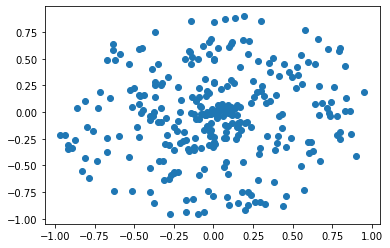

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1])
plt.show()

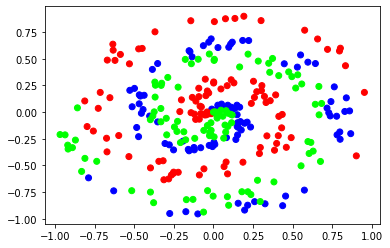

In [10]:
plt.scatter(X[:, 0], X[:,1], c = y, cmap = 'brg')
plt.show()

# Dense Layer Class

In [13]:
class Layer_Dense:
    # Layer intialization
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    # Forward Pass
    def forward(self, inputs):
        self.output = np.dot(inputs,self.weights) + biases

# Feeding Data and performing forward pass

In [21]:
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

# Create Dataset
X,y = spiral_data(samples = 100, classes = 3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2,3)

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Let's see output of the first few samples:


array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.0475188e-04,  1.1395361e-04, -4.7983500e-05],
       [-2.7414842e-04,  3.1729150e-04, -8.6921798e-05],
       [-4.2188365e-04,  5.2666257e-04, -5.5912682e-05],
       [-5.7707680e-04,  7.1401405e-04, -8.9430439e-05]], dtype=float32)

# The Softmax Activation Function

In [25]:
layer_outputs = [4.8, 1.21, 2.385]

# e - mathematical constant, we use E here to match a common coding
# style where constants are uppercased
E = 2.71828182846 # you can also use math.e

# For each value in a vector, calculate the exponential value
exp_values = []
for output in layer_outputs:
    exp_values.append(E ** output) # ** - power operator in Python
print('exponentiated values:')
print(exp_values)

exponentiated values:
[121.51041751893969, 3.3534846525504487, 10.85906266492961]


# Normalized Exponentiated Values

In [27]:
# Now normalize values
norm_base = sum(exp_values) # We sum all values
norm_values = []
for value in exp_values:
    norm_values.append(value / norm_base)
print('Normalized exponentiated values:')
print(norm_values)
print('Sum of normalized values:', sum(norm_values))

Normalized exponentiated values:
[0.8952826639573506, 0.024708306782070668, 0.08000902926057876]
Sum of normalized values: 1.0


# Using Numpy

In [28]:
layer_outputs = [4.8, 1.21, 2.385]

# For each value in a vector, calculate the exponential value
exp_values = np.exp(layer_outputs)
print('exponentiated values:')
print(exp_values)

# Now normalize values
norm_values = exp_values / np.sum(exp_values)
print('normalized exponentiated values:')
print(norm_values)
print('sum of normalized values:', np.sum(norm_values))

exponentiated values:
[121.51041752   3.35348465  10.85906266]
normalized exponentiated values:
[0.89528266 0.02470831 0.08000903]
sum of normalized values: 0.9999999999999999


# Batches of Data